# Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

myparams = {
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    'font.family': 'Djvu Serif',
    'font.size': 16,
    'axes.grid': True,
    'grid.alpha': 0.1,
    'lines.linewidth': 2
}
plt.rcParams.update(myparams)

%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%autoreload 2

np.random.seed(307)

In [23]:
from stuff import (
    get_means_variances,
    sufficient_vs_threshold,
    approx
)

from data import (
    synthetic_regression,
    synthetic_classification,
    liver_disorders
)

from visualize import (
    plot_means_variances,
    plot_sufficient_vs_threshold,
    plot_approximation
)

# Synthetic regression

In [3]:
# set number of samples and features in synthetic dataset
n_samples = 1000
n_features = 20

In [4]:
%%time
X_regression, y_regression = synthetic_regression(n_samples=n_samples,
                                                    n_features=n_features)

CPU times: user 43.9 s, sys: 193 ms, total: 44.1 s
Wall time: 7.08 s


In [5]:
sample_sizes_regression = np.linspace(X_regression.shape[1]+1, X_regression.shape[0], 100, dtype=int)
means_regression, variances_regression = get_means_variances(X_regression, y_regression, sample_sizes_regression, 
                                                             task='regression', B=100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [60]:
means_approximation_regression, variances_approximation_regression = approx(sample_sizes_regression,
                                                                            means_regression,
                                                                            variances_regression)

In [25]:
thresholds_regression = np.logspace(-2, 10, 1000)

sufficient_regression = sufficient_vs_threshold(sample_sizes=sample_sizes_regression,
                                                means=means_regression,
                                                variances=variances_regression,
                                                thresholds=thresholds_regression)

# Synthetic classification

In [6]:
# set number of samples and features in synthetic dataset
n_samples = 1000
n_features = 20

In [7]:
%%time
X_classification, y_classification = synthetic_classification(n_samples=n_samples,
                                                              n_features=n_features)

CPU times: user 70.3 ms, sys: 3.72 ms, total: 74 ms
Wall time: 13.2 ms


In [8]:
sample_sizes_classification = np.linspace(X_classification.shape[1]+1, X_classification.shape[0], 100, dtype=int)
means_classification, variances_classification = get_means_variances(X_classification, y_classification, sample_sizes_classification, 
                                                                    task='classification', B=100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [61]:
means_approximation_classification, variances_approximation_classification = approx(sample_sizes_classification,
                                                                            means_classification,
                                                                            variances_classification)

In [27]:
thresholds_classification = np.logspace(-2, 10, 1000)

sufficient_classification = sufficient_vs_threshold(sample_sizes=sample_sizes_classification,
                                                means=means_classification,
                                                variances=variances_classification,
                                                thresholds=thresholds_classification)

# Liver Disorders

In [9]:
%%time
X, y = liver_disorders()

CPU times: user 1.09 s, sys: 63 ms, total: 1.15 s
Wall time: 3.55 s


In [10]:
sample_sizes = np.linspace(X.shape[1]+1, X.shape[0], 100, dtype=int)
means, variances = get_means_variances(X, y, sample_sizes, task='liver-disorders', B=1000)

  0%|          | 0/100 [00:00<?, ?it/s]

In [62]:
means_approximation, variances_approximation = approx(sample_sizes, means, variances)

In [29]:
thresholds = np.logspace(-2, 10, 1000)

sufficient = sufficient_vs_threshold(sample_sizes=sample_sizes,
                                                means=means,
                                                variances=variances,
                                                thresholds=thresholds_classification)

# Plots

Synthetic regression

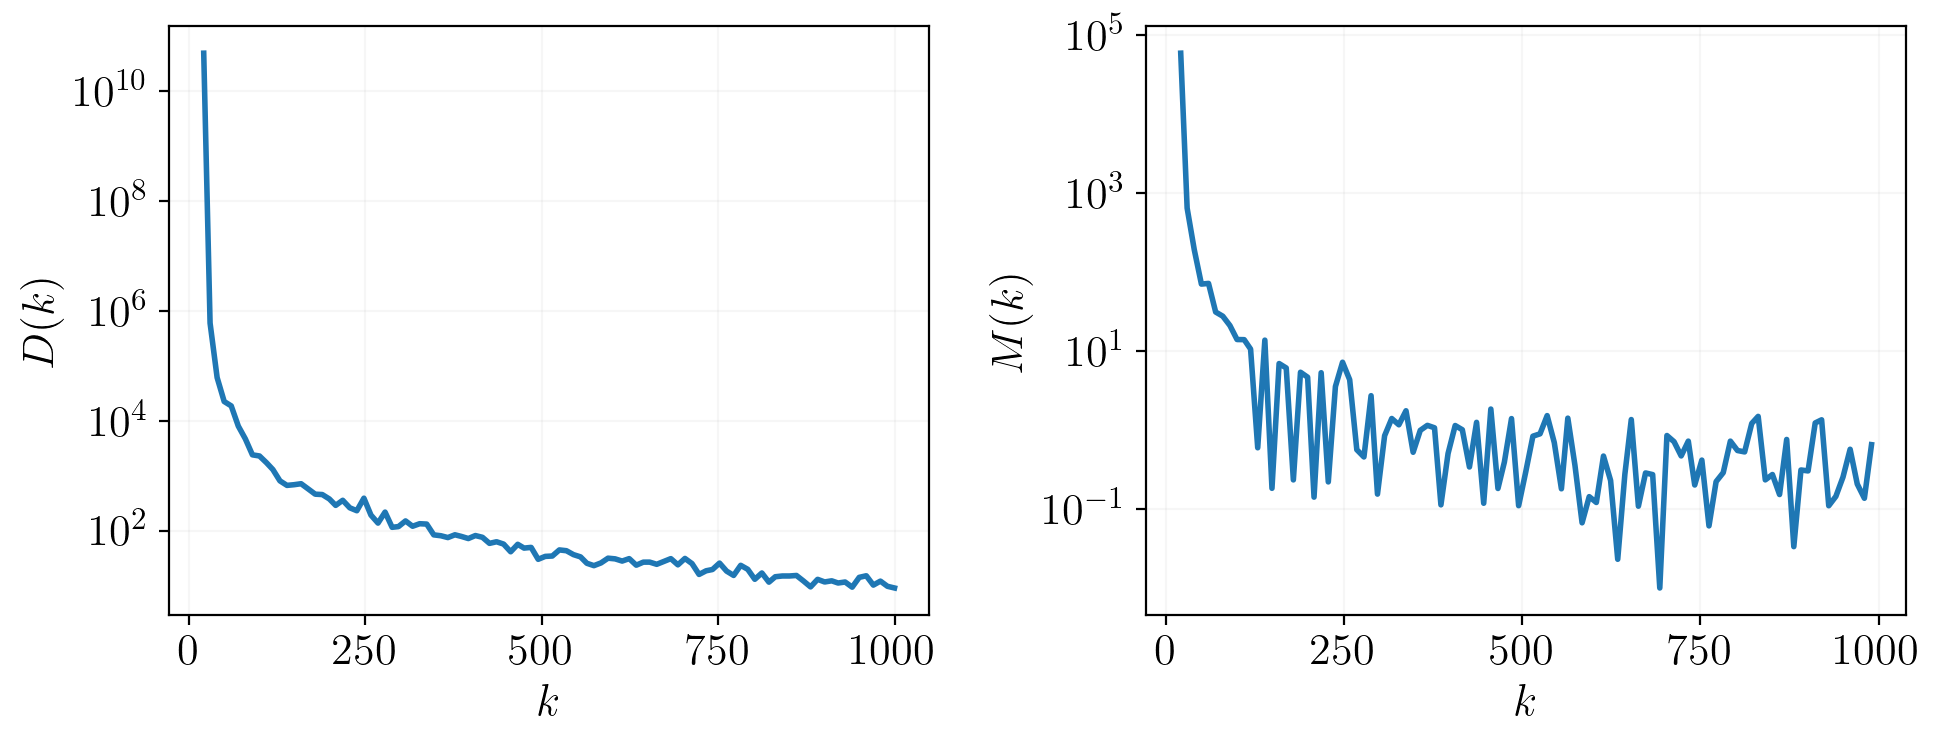

In [33]:
plot_means_variances(sample_sizes_regression, 
                     means_regression, variances_regression,
                     save=True, filename='figs/synthetic-regression.pdf')

Synthetic classification

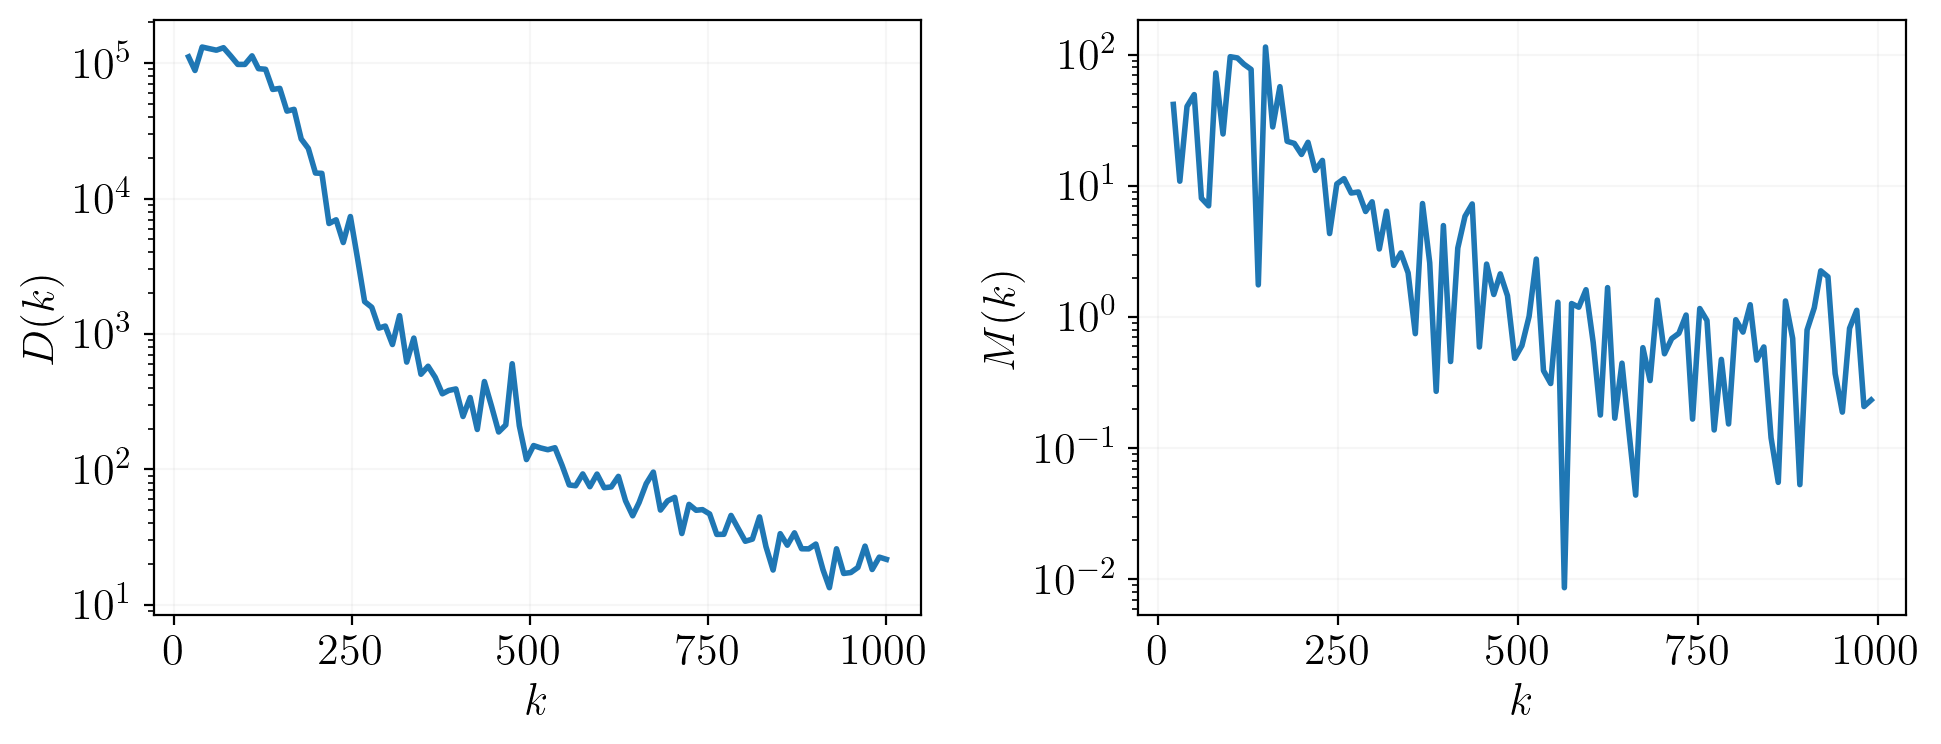

In [35]:
plot_means_variances(sample_sizes_classification, 
                     means_classification, variances_classification,
                     save=True, filename='figs/synthetic-classification.pdf')

Liver Disorders

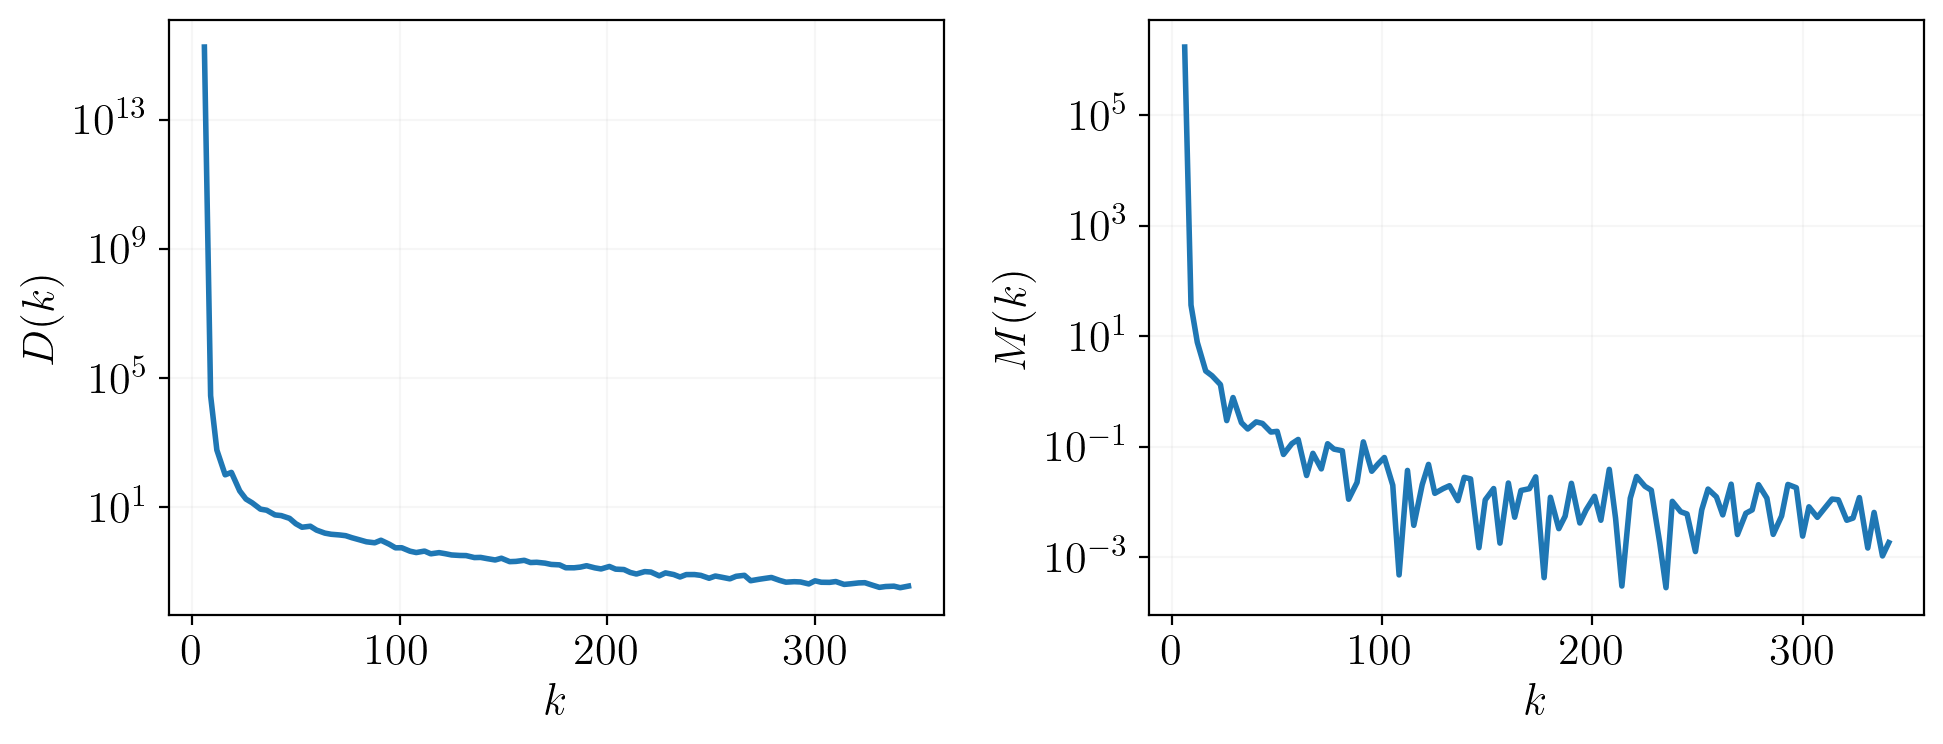

In [37]:
plot_means_variances(sample_sizes, means, variances,
                     save=True, filename='figs/liver-disorders.pdf')

Sufficient sample size vs threshold

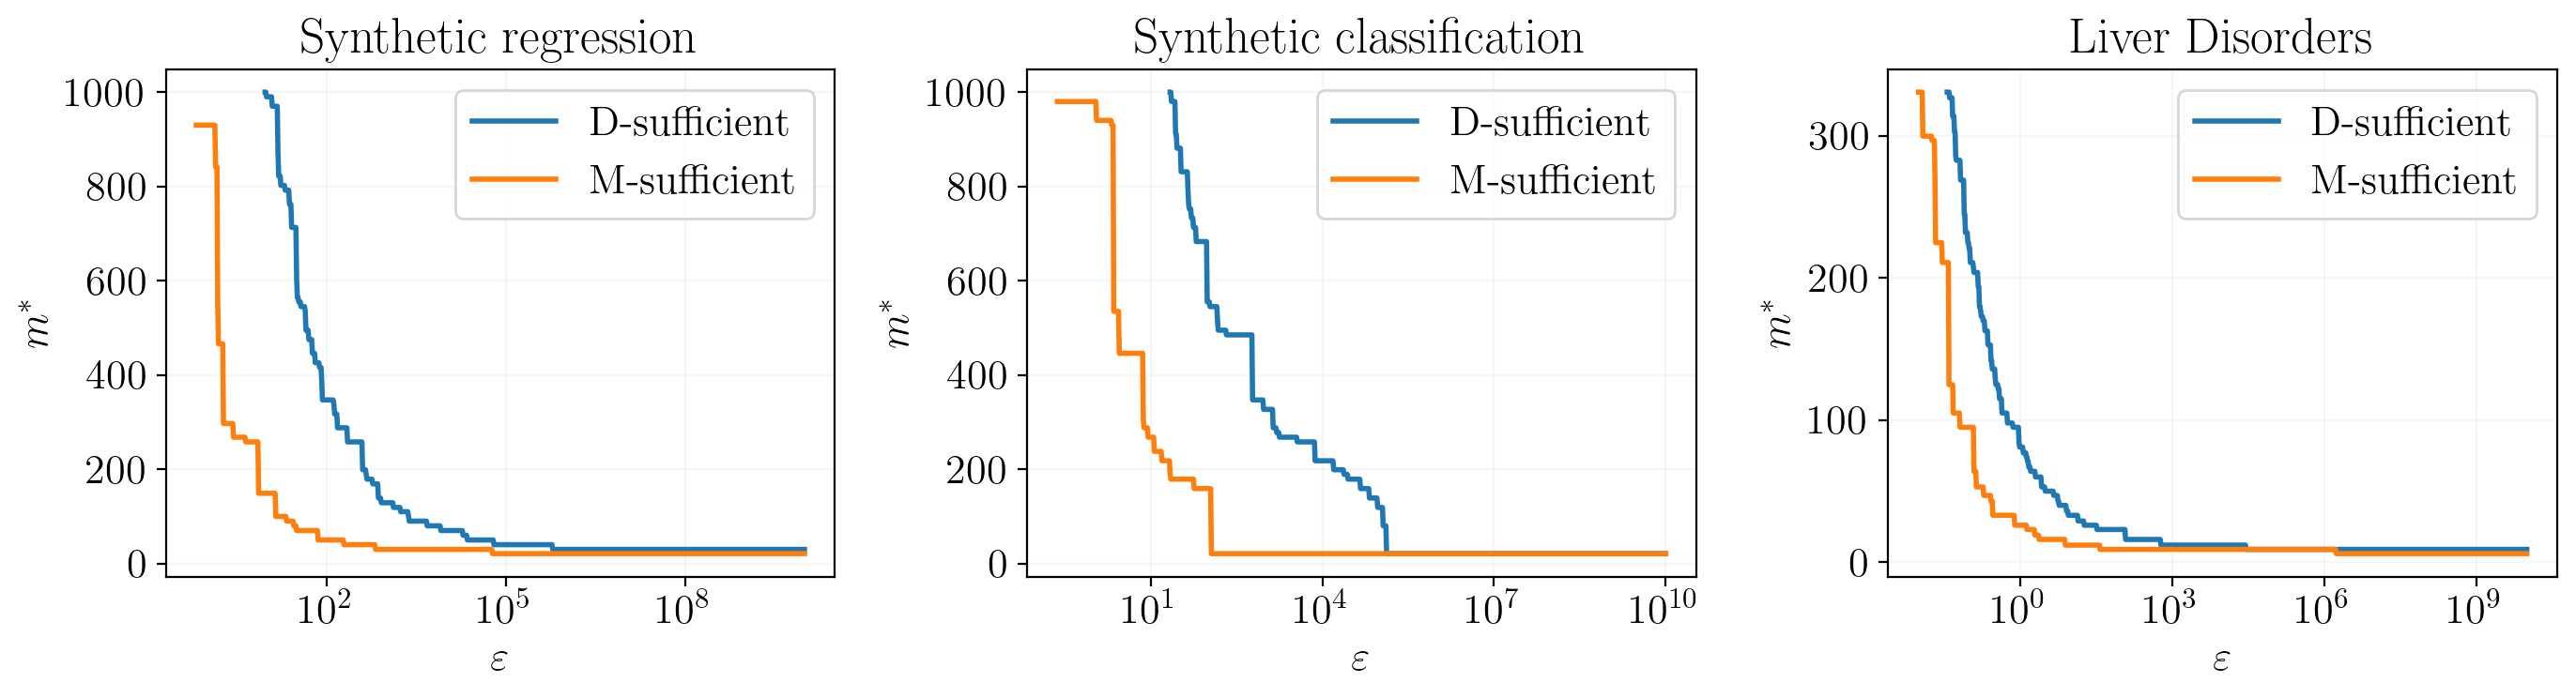

In [39]:
plot_sufficient_vs_threshold(thresholds_regression,
                             sufficient_regression,
                             thresholds_classification,
                             sufficient_classification,
                             thresholds,
                             sufficient,
                             save=True, filename='figs/sufficient-vs-threshold.pdf')